## Classification on 8 celebrities

In this notebook we try to classify images of : "Miranda_Cosgrove" "Chris_Martin" "Emma_Stone" "Jamie_Foxx" "Steve_Jobs" "Zac_Efron" "Sandra_Oh" "Taryn_Manning". There are 350 images of each celebrity, we use 250 for traning and 50 for validation and test.

In [1]:
import gzip
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as imgplot
import time
%matplotlib inline
import h5py

Reading in the data, it is already prepared in a train, validation and testset. The class labels are form 0 to 7. The pixelsize of every image is 48x48 and we have 3 channels (RGB) per image. All 3 sets are balanced.

In [2]:
h5f_X = h5py.File('C:/Users/Elvis/Dropbox/DAS_DL_shared/Excercises/8_faces_no_cut/Data_8_faces_no_cut.hdf5', 'r')
print(list(h5f_X.keys()))
X_train = h5f_X['X_train_8_faces']
print(X_train.shape)
Y_train = h5f_X['Y_train_8_faces']
print(Y_train.shape)
X_valid = h5f_X['X_valid_8_faces']
print(X_valid.shape)
Y_valid = h5f_X['Y_valid_8_faces']
print(Y_valid.shape)

['X_test_8_faces', 'X_train_8_faces', 'X_valid_8_faces', 'Y_test_8_faces', 'Y_train_8_faces', 'Y_valid_8_faces']
(2000, 48, 48, 3)
(2000,)
(400, 48, 48, 3)
(400,)


(array([ 250.,  250.,  250.,  250.,  250.,  250.,  250.,  250.]),
 array([ 0.   ,  0.875,  1.75 ,  2.625,  3.5  ,  4.375,  5.25 ,  6.125,  7.   ]),
 <a list of 8 Patch objects>)

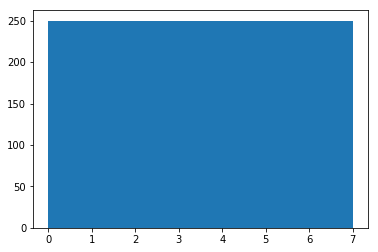

In [3]:
plt.hist(Y_train,bins=8)

(array([ 50.,  50.,  50.,  50.,  50.,  50.,  50.,  50.]),
 array([ 0.   ,  0.875,  1.75 ,  2.625,  3.5  ,  4.375,  5.25 ,  6.125,  7.   ]),
 <a list of 8 Patch objects>)

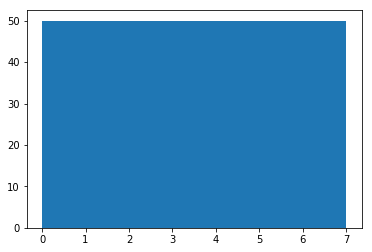

In [4]:
plt.hist(Y_valid,bins=8)

How hard is this task? Lets plot some random image of the trainset to get an impression of the images and of  the task. 

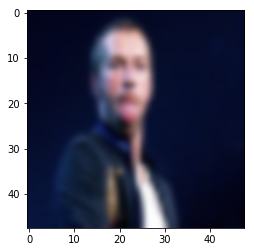

In [5]:
rmd=np.random.randint(0,len(X_train))
plt.imshow(np.asarray(X_train[rmd],dtype="uint8"),interpolation="bicubic")

#### Normalization of the training and validationset.

In [6]:
X_mean = np.mean( X_train, axis = 0)
X_std = np.std( X_train, axis = 0)

X_train = (X_train - X_mean ) / (X_std + 0.0001)
X_valid = (X_valid - X_mean ) / (X_std + 0.0001)

In [7]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


Define the convertToOneHot function and convert the labels into the onehot encoding.

In [8]:
def convertToOneHot(vector, num_classes=None):
    result = np.zeros((len(vector), num_classes), dtype='int32')
    result[np.arange(len(vector)), vector] = 1
    return result

In [9]:
Y_train=convertToOneHot(Y_train,num_classes=8)
Y_valid=convertToOneHot(Y_valid,num_classes=8)

In [10]:
batch_size = 128
nb_classes = 8
nb_epoch = 50
img_rows, img_cols = 48, 48
kernel_size = (3, 3)
input_shape = (img_rows, img_cols, 3)
pool_size = (2, 2)

In [11]:
print(Y_train[1])
print(Y_valid[1])

[0 0 0 1 0 0 0 0]
[0 0 0 0 0 1 0 0]


In [12]:
print(X_train.shape)
print(X_valid.shape)

(2000, 48, 48, 3)
(400, 48, 48, 3)


### Define the network

In [13]:
model = Sequential()
name = 'cnn'

model.add(Convolution2D(32, kernel_size[0], kernel_size[1],init='he_normal',
                        border_mode='same',
                        input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(32, kernel_size[0], kernel_size[1],init='he_normal',border_mode='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))

model.add(Convolution2D(64, kernel_size[0], kernel_size[1],init='he_normal',border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(64, kernel_size[0], kernel_size[1],init='he_normal',border_mode='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))

model.add(Flatten())#macht einen vektor aus dem output
model.add(Dense(200,init='he_normal'))
model.add(Activation('relu'))
model.add(Dense(nb_classes,init='he_normal'))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [14]:
model = Sequential()
name = 'cnn_dropout'

model.add(Convolution2D(32, kernel_size[0], kernel_size[1],init='he_normal',
                        border_mode='same',
                        input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(32, kernel_size[0], kernel_size[1],init='he_normal',border_mode='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.3))

model.add(Convolution2D(64, kernel_size[0], kernel_size[1],init='he_normal',border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(64, kernel_size[0], kernel_size[1],init='he_normal',border_mode='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.3))

model.add(Flatten())#macht einen vektor aus dem output
model.add(Dense(200,init='he_normal'))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(nb_classes,init='he_normal'))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [15]:
model = Sequential()
name = 'cnn_dropout_batchnorm'

model.add(Convolution2D(32, kernel_size[0], kernel_size[1],init='he_normal',
                        border_mode='same',
                        input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(32, kernel_size[0], kernel_size[1],init='he_normal',border_mode='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.3))

model.add(Convolution2D(64, kernel_size[0], kernel_size[1],init='he_normal',border_mode='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(64, kernel_size[0], kernel_size[1],init='he_normal',border_mode='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.3))

model.add(Flatten())#macht einen vektor aus dem output
model.add(Dense(200,init='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(nb_classes,init='he_normal'))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [16]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_9 (Convolution2D)  (None, 48, 48, 32)    896         convolution2d_input_3[0][0]      
____________________________________________________________________________________________________
batchnormalization_1 (BatchNorma (None, 48, 48, 32)    128         convolution2d_9[0][0]            
____________________________________________________________________________________________________
activation_13 (Activation)       (None, 48, 48, 32)    0           batchnormalization_1[0][0]       
____________________________________________________________________________________________________
convolution2d_10 (Convolution2D) (None, 48, 48, 32)    9248        activation_13[0][0]              
___________________________________________________________________________________________

### Running a forward pass of the untrained network

In [17]:
model.evaluate(X_train[0:300],Y_train[0:300])

300/300 [==============================] - 11s     


[2.8540560150146486, 0.10666666676600774]

In [18]:
-np.log(1/8.)

2.0794415416798357

In [19]:
model.predict(X_train[0].reshape(1,48,48,3))

array([[ 0.19476832,  0.0578845 ,  0.2050416 ,  0.09757278,  0.01178464,
         0.14504622,  0.03883254,  0.24906947]], dtype=float32)

In [20]:
tensorboard = keras.callbacks.TensorBoard(
        log_dir='tensorboard/8_faces/' + name + '/', 
        write_graph=True,
        histogram_freq=1)

### Training the network

In [21]:
history=model.fit(X_train, Y_train, 
                  batch_size=batch_size, 
                  nb_epoch=30,
                  verbose=1, 
                  validation_data=(X_valid, Y_valid),
                  callbacks=[tensorboard])

Train on 2000 samples, validate on 400 samples
INFO:tensorflow:Summary name convolution2d_9_W:0 is illegal; using convolution2d_9_W_0 instead.
INFO:tensorflow:Summary name convolution2d_9_b:0 is illegal; using convolution2d_9_b_0 instead.
INFO:tensorflow:Summary name batchnormalization_1_gamma:0 is illegal; using batchnormalization_1_gamma_0 instead.
INFO:tensorflow:Summary name batchnormalization_1_beta:0 is illegal; using batchnormalization_1_beta_0 instead.
INFO:tensorflow:Summary name batchnormalization_1_running_mean:0 is illegal; using batchnormalization_1_running_mean_0 instead.
INFO:tensorflow:Summary name batchnormalization_1_running_std:0 is illegal; using batchnormalization_1_running_std_0 instead.
INFO:tensorflow:Summary name convolution2d_10_W:0 is illegal; using convolution2d_10_W_0 instead.
INFO:tensorflow:Summary name convolution2d_10_b:0 is illegal; using convolution2d_10_b_0 instead.
INFO:tensorflow:Summary name batchnormalization_2_gamma:0 is illegal; using batchnorm

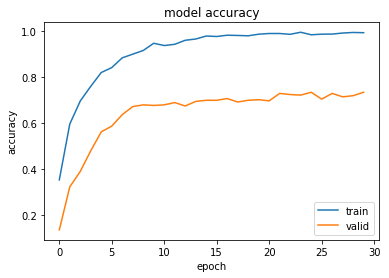

In [22]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.show()

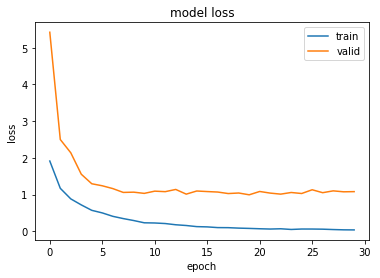

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

### Evaluation of the trained network

In [24]:
X_test = h5f_X['X_test_8_faces']
print(X_test.shape)
Y_test = h5f_X['Y_test_8_faces']
print(Y_test.shape)

(400, 48, 48, 3)
(400,)


In [25]:
X_test = (X_test - X_mean ) / (X_std + 0.0001)

In [26]:
model.predict(X_test[0].reshape(1,48,48,3))

array([[  2.33014107e-05,   4.76032943e-01,   1.11317160e-04,
          6.70809008e-04,   8.01647093e-06,   4.49673474e-01,
          5.34861274e-02,   1.99939311e-02]], dtype=float32)

In [27]:
preds=np.zeros([len(X_test),8])
for i in range(0,len(X_test)):
    preds[i]=model.predict(X_test[i].reshape(1,48,48,3))

In [28]:
pred=np.zeros([len(X_test)])
for i in range(0,len(X_test)):
    pred[i]=np.argmax(preds[i])

In [29]:
sum(pred==Y_test)/400.

0.72499999999999998

In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, pred)

array([[29,  2,  4,  2,  0,  0, 12,  1],
       [ 0, 26,  4,  5,  5,  2,  4,  4],
       [ 1,  3, 41,  1,  0,  0,  0,  4],
       [ 1,  1,  2, 42,  0,  2,  0,  2],
       [ 0,  4,  0,  1, 44,  0,  0,  1],
       [ 0,  6,  1,  4,  1, 34,  3,  1],
       [ 0,  1,  2,  3,  1,  1, 40,  2],
       [ 0,  4,  3,  0,  2,  2,  5, 34]])